# Day 39 — Hypothesis-Led EDA
Palmer Penguins Dataset

## Kaggle Setup
Add the Palmer Penguins dataset and update the path below.

In [8]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# UPDATE PATH
df = pd.read_csv("/kaggle/input/datasets/satyajeetrai/palmer-penguins-dataset-for-eda/penguins.csv")
df.head()


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Basic Cleaning

In [9]:

numeric_cols = [
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=numeric_cols)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 342 non-null    int64  
 1   species            342 non-null    object 
 2   island             342 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               342 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.7+ KB


## Hypothesis 1
### Gentoo penguins have higher body mass than other species

In [10]:

species_mass = df.groupby("species")["body_mass_g"].mean().sort_values(ascending=False)
species_mass


species
Gentoo       5076.016260
Chinstrap    3733.088235
Adelie       3700.662252
Name: body_mass_g, dtype: float64

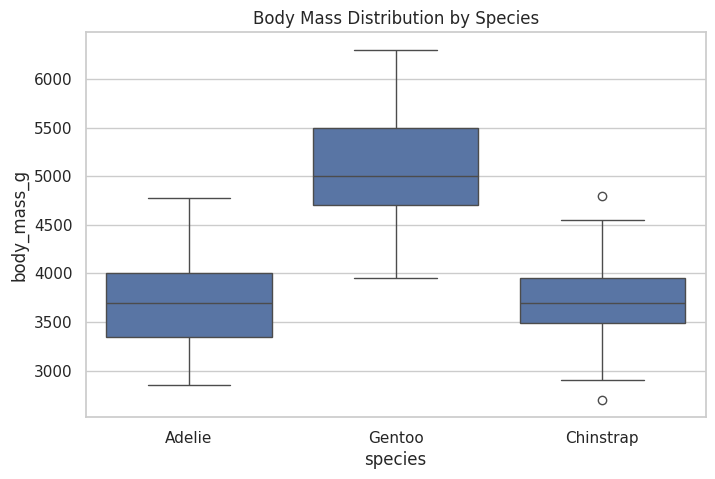

In [11]:

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="species", y="body_mass_g")
plt.title("Body Mass Distribution by Species")
plt.show()


## Hypothesis 2
### Flipper length positively correlates with body mass

In [12]:

correlation = df["flipper_length_mm"].corr(df["body_mass_g"])
correlation


np.float64(0.8712017673060114)

0.8 ~ strong positive

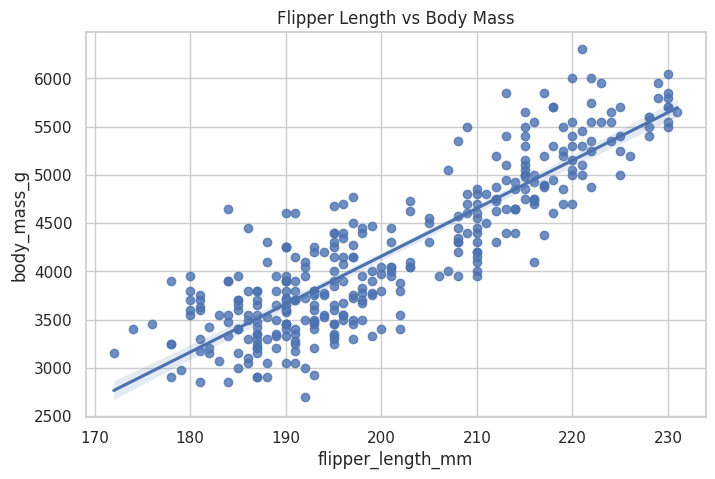

In [13]:

plt.figure(figsize=(8,5))
sns.regplot(data=df, x="flipper_length_mm", y="body_mass_g")
plt.title("Flipper Length vs Body Mass")
plt.show()


body mass directly proportional to flipper length